<a href="https://colab.research.google.com/github/daanishrasheed/DS-Unit-2-Applied-Modeling/blob/master/module2/assignment_applied_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving pbp-2018.csv to pbp-2018.csv


In [3]:
import pandas as pd
play = pd.read_csv('pbp-2018.csv', engine='python')
print(play.shape)
play.head()

(45016, 45)


,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2018090600,2018-09-06,2,6,9,PHI,ATL,0,0,35,NaN,1,NaN,0,4-J.ELLIOTT KICKS 65 YARDS FROM PHI 35 TO END ...,0,NaN,NaN,2018,0,UNDER CENTER,KICK OFF,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,35,OWN,0,NaN,0,NaN,0
1,2018090600,2018-09-06,2,0,0,NaN,ATL,0,0,0,NaN,1,NaN,0,END QUARTER 2,0,NaN,NaN,2018,0,NaN,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
2,2018090600,2018-09-06,3,0,0,NaN,ATL,0,0,0,NaN,1,NaN,0,END QUARTER 3,0,NaN,NaN,2018,0,NaN,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
3,2018090600,2018-09-06,4,2,19,NaN,ATL,0,0,0,NaN,1,NaN,0,TIMEOUT #2 BY PHI AT 02:19.,0,NaN,NaN,2018,0,UNDER CENTER,TIMEOUT,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
4,2018090600,2018-09-06,4,1,18,NaN,ATL,0,0,0,NaN,1,NaN,0,TIMEOUT #2 BY ATL AT 01:18.,0,NaN,NaN,2018,0,UNDER CENTER,TIMEOUT,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0


In [0]:
play = play.drop(play[play.Down == 0].index)

In [5]:
play.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
15,2018090903,2018-09-09,4,0,10,MIA,TEN,1,10,52,NaN,0,NaN,0,(:10) 17-R.TANNEHILL KNEELS TO TEN 49 FOR -1 Y...,0,NaN,NaN,2018,0,UNDER CENTER,QB KNEEL,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,48,OPP,0,NaN,0,NaN,0
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,NaN,1,NaN,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,NaN,NaN,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,NaN,0,NaN,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,NaN,NaN,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,NaN,0,NaN,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,NaN,NaN,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,NaN,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,NaN,1,NaN,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,NaN,NaN,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0


In [0]:
df = play.drop(columns=['Unnamed: 10', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17', 'Challenger'])

In [7]:
df.tail(5)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
45011,2018123015,2018-12-30,4,2,0,ARI,SEA,3,12,63,0,0,(2:00) (SHOTGUN) 3-J.ROSEN PASS INCOMPLETE DEE...,0,2018,0,SHOTGUN,PASS,0,1,1,0,DEEP MIDDLE,0,0,0,0,0,0,0,0,0,NaN,37,OPP,0,NaN,0,NaN,0
45012,2018123015,2018-12-30,4,1,54,ARI,SEA,4,12,63,0,0,(1:54) 5-Z.GONZALEZ 55 YARD FIELD GOAL IS GOOD...,0,2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,37,OPP,0,NaN,0,NaN,0
45013,2018123015,2018-12-30,4,0,16,SEA,ARI,2,8,77,1,0,(:16) 53-J.HUNT REPORTED IN AS ELIGIBLE. 32-C...,0,2018,11,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,23,OPP,0,NaN,0,NaN,0
45014,2018123015,2018-12-30,4,0,8,SEA,ARI,1,10,88,0,0,(:08) 3-R.WILSON KNEELS TO ARI 15 FOR -3 YARDS.,0,2018,0,UNDER CENTER,QB KNEEL,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,12,OPP,0,NaN,0,NaN,0
45015,2018123015,2018-12-30,4,0,3,SEA,ARI,2,13,85,0,0,(:03) 11-S.JANIKOWSKI 33 YARD FIELD GOAL IS GO...,0,2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,15,OPP,0,NaN,0,NaN,0


In [0]:
df1 = df.drop(df[(df.IsRush == 1) & (df.IsPass == 1)].index)

In [9]:
df1.head(10)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
15,2018090903,2018-09-09,4,0,10,MIA,TEN,1,10,52,0,0,(:10) 17-R.TANNEHILL KNEELS TO TEN 49 FOR -1 Y...,0,2018,0,UNDER CENTER,QB KNEEL,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,48,OPP,0,NaN,0,NaN,0
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,1,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,0,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,0,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,1,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,17,0,0,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,0,2018,-3,SHOTGUN,SACK,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,17,OWN,0,NaN,0,NaN,0
43,2018091601,2018-09-16,3,11,8,BUF,LAC,1,1,99,1,0,"(11:08) 33-C.IVORY UP THE MIDDLE FOR 1 YARD, T...",0,2018,1,UNDER CENTER,RUSH,1,0,0,1,NaN,0,0,0,0,0,0,0,0,0,CENTER,1,OPP,0,NaN,0,NaN,0
47,2018091603,2018-09-16,4,0,3,NO,CLE,1,10,42,0,0,(:03) 9-D.BREES KNEELS TO NO 41 FOR -1 YARDS.,0,2018,0,UNDER CENTER,QB KNEEL,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,42,OWN,0,NaN,0,NaN,0
48,2018091604,2018-09-16,1,1,16,MIA,NYJ,3,1,94,1,0,"(1:16) 32-K.DRAKE UP THE MIDDLE FOR 6 YARDS, T...",0,2018,6,UNDER CENTER,RUSH,1,0,0,1,NaN,0,0,0,0,0,0,0,0,0,CENTER,6,OPP,0,NaN,0,NaN,0
55,2018091608,2018-09-16,2,12,29,WAS,IND,1,5,68,0,0,(12:29) 11-A.SMITH SACKED AT IND 39 FOR -7 YAR...,0,2018,-7,UNDER CENTER,SACK,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,32,OPP,0,NaN,0,NaN,0


In [0]:
df = df1.drop(df1[df1.PlayType == 'QB KNEEL'].index)

In [11]:
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,1,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,0,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,0,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,1,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,17,0,0,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,0,2018,-3,SHOTGUN,SACK,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,17,OWN,0,NaN,0,NaN,0


In [12]:
df['PlayType'].value_counts()

PASS          18490
RUSH          12173
PUNT           2294
SACK           1370
FIELD GOAL      948
NO PLAY         826
SCRAMBLE        826
FUMBLES          85
CLOCK STOP       78
EXCEPTION        55
PENALTY           2
Name: PlayType, dtype: int64

In [13]:
df['Formation'].value_counts()

SHOTGUN              19582
UNDER CENTER         11786
PUNT                  2215
NO HUDDLE SHOTGUN     2065
FIELD GOAL             948
NO HUDDLE              576
WILDCAT                  1
Name: Formation, dtype: int64

In [0]:
df = df.drop(df[df.Formation == 'PUNT'].index)
df = df.drop(df[df.PlayType == 'PUNT'].index)
df = df.drop(df[df.Formation == 'FIELD GOAL'].index)
df = df.drop(df[df.PlayType == 'FIELD GOAL'].index)

In [15]:
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,1,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,0,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,0,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,1,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,17,0,0,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,0,2018,-3,SHOTGUN,SACK,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,17,OWN,0,NaN,0,NaN,0


In [16]:
df['PlayType'].value_counts()

PASS          18489
RUSH          12173
SACK           1370
NO PLAY         826
SCRAMBLE        826
FUMBLES          85
CLOCK STOP       78
EXCEPTION        55
PENALTY           2
Name: PlayType, dtype: int64

In [0]:
df = df.drop(df[df.PlayType == 'NO PLAY'].index)
df = df.drop(df[df.PlayType == 'FUMBLES'].index)
df = df.drop(df[df.PlayType == 'CLOCK STOP'].index)
df = df.drop(df[df.PlayType == 'EXCEPTION'].index)
df = df.drop(df[df.PlayType == 'PENALTY'].index)

In [0]:
df = df.replace('SACK', 'PASS')
df = df.replace('SCRAMBLE', 'RUSH')

In [19]:
df['Formation'].head(20)

22              SHOTGUN
24         UNDER CENTER
34              SHOTGUN
35    NO HUDDLE SHOTGUN
42              SHOTGUN
43         UNDER CENTER
48         UNDER CENTER
55         UNDER CENTER
58            NO HUDDLE
62         UNDER CENTER
65         UNDER CENTER
66              SHOTGUN
71              SHOTGUN
75         UNDER CENTER
85              SHOTGUN
86              SHOTGUN
87              SHOTGUN
88              SHOTGUN
89              SHOTGUN
92         UNDER CENTER
Name: Formation, dtype: object

In [20]:
df.iloc[19582]

GameId                                                                   2018090908
GameDate                                                                 2018-09-09
Quarter                                                                           2
Minute                                                                           10
Second                                                                           14
OffenseTeam                                                                     LAC
DefenseTeam                                                                      KC
Down                                                                              2
ToGo                                                                             10
YardLine                                                                         66
SeriesFirstDown                                                                   0
NextScore                                                                   

In [21]:
df.head(13345)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,1,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,0,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,0,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,1,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,17,0,0,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,0,2018,-3,SHOTGUN,PASS,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,17,OWN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19581,2018112600,2018-11-26,2,14,53,TEN,HOU,1,10,25,0,0,(14:53) 8-M.MARIOTA SCRAMBLES RIGHT END TO TEN...,0,2018,2,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0
19582,2018112600,2018-11-26,2,14,15,TEN,HOU,2,8,27,0,0,(14:15) (SHOTGUN) DIRECT SNAP TO 22-D.HENRY. ...,0,2018,0,SHOTGUN,NaN,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,27,OWN,0,NaN,0,NaN,0
19584,2018112600,2018-11-26,2,9,36,HOU,TEN,1,10,3,1,0,"(9:36) 26-L.MILLER RIGHT GUARD FOR 97 YARDS, T...",0,2018,97,UNDER CENTER,RUSH,1,0,0,1,NaN,0,0,0,0,0,0,0,0,0,RIGHT GUARD,3,OWN,0,NaN,0,NaN,0
19586,2018112600,2018-11-26,2,9,13,TEN,HOU,1,10,24,0,0,(9:13) 33-D.LEWIS LEFT GUARD TO TEN 23 FOR -1 ...,0,2018,-1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,1,0,0,LEFT GUARD,24,OWN,1,TEN,1,OFFENSIVE HOLDING,10


In [0]:
values = {'PlayType':'RUSH'}
df = df.fillna(value=values)

In [0]:
df['Formation play'] = df[['Formation', 'PlayType']].apply(lambda x: ' '.join(x), axis=1)

In [0]:
df = df.drop(df[df.Formation == 'WILDCAT'].index)

In [25]:
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Formation play
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,1,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0,SHOTGUN RUSH
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,0,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0,UNDER CENTER RUSH
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,0,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0,SHOTGUN PASS
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,1,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0,NO HUDDLE SHOTGUN PASS
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,17,0,0,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,0,2018,-3,SHOTGUN,PASS,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,17,OWN,0,NaN,0,NaN,0,SHOTGUN PASS


In [0]:
df['GameDate']= pd.to_datetime(df['GameDate'])

In [0]:
test = df[((df.GameDate.dt.month == 12)) & ((df.GameDate.dt.day ==22) | (df.GameDate.dt.day == 23) | (df.GameDate.dt.day == 24) | (df.GameDate.dt.day == 30))]

In [28]:
test.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Formation play
162,2018123000,2018-12-30,3,9,30,BAL,CLE,3,2,75,1,0,(9:30) (SHOTGUN) 8-L.JACKSON RIGHT GUARD TO CL...,0,2018,3,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT GUARD,25,OPP,0,NaN,0,NaN,0,SHOTGUN RUSH
163,2018123000,2018-12-30,3,8,52,BAL,CLE,1,10,78,0,0,(8:52) (SHOTGUN) 35-G.EDWARDS UP THE MIDDLE TO...,0,2018,2,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,CENTER,22,OPP,0,NaN,0,NaN,0,SHOTGUN RUSH
485,2018123000,2018-12-30,3,6,55,CLE,BAL,1,10,35,0,0,(6:55) 24-N.CHUBB LEFT GUARD TO CLE 31 FOR -4 ...,0,2018,-4,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,LEFT GUARD,35,OWN,0,NaN,0,NaN,0,UNDER CENTER RUSH
486,2018123000,2018-12-30,3,6,17,CLE,BAL,2,14,31,0,0,(6:17) (SHOTGUN) 6-B.MAYFIELD PASS SHORT RIGHT...,0,2018,3,SHOTGUN,PASS,0,1,0,0,SHORT RIGHT,0,0,0,0,0,0,0,0,0,NaN,31,OWN,0,NaN,0,NaN,0,SHOTGUN PASS
487,2018123000,2018-12-30,3,5,36,CLE,BAL,3,11,34,0,0,(5:36) (SHOTGUN) 6-B.MAYFIELD PASS INCOMPLETE ...,0,2018,0,SHOTGUN,PASS,0,1,1,0,DEEP LEFT,0,0,0,0,0,0,0,0,0,NaN,34,OWN,0,NaN,0,NaN,0,SHOTGUN PASS


In [0]:
train = df[(df.GameDate.dt.month == 9) | (df.GameDate.dt.month == 10) | (((df.GameDate.dt.month == 11)) & ((df.GameDate.dt.day == 5) | (df.GameDate.dt.day == 4) | (df.GameDate.dt.day == 1) | (df.GameDate.dt.day == 11) | (df.GameDate.dt.day == 12) | (df.GameDate.dt.day == 8)))]

In [30]:
train.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Formation play
22,2018090908,2018-09-09,2,7,8,KC,LAC,2,7,28,1,0,(7:08) (SHOTGUN) 15-P.MAHOMES RIGHT END TO KC ...,0,2018,8,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,28,OWN,0,NaN,0,NaN,0,SHOTGUN RUSH
24,2018090909,2018-09-09,3,14,26,ARI,WAS,1,10,52,0,0,(14:26) 31-D.JOHNSON UP THE MIDDLE TO WAS 47 F...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,CENTER,48,OPP,0,NaN,0,NaN,0,UNDER CENTER RUSH
34,2018091000,2018-09-10,3,7,0,DET,NYJ,1,10,25,0,0,(7:00) (SHOTGUN) 9-M.STAFFORD PASS INCOMPLETE ...,0,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0,SHOTGUN PASS
35,2018091000,2018-09-10,3,0,4,DET,NYJ,1,10,38,1,0,"(:04) (NO HUDDLE, SHOTGUN) 9-M.STAFFORD PASS S...",0,2018,13,NO HUDDLE SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,38,OWN,0,NaN,0,NaN,0,NO HUDDLE SHOTGUN PASS
42,2018091601,2018-09-16,1,11,32,BUF,LAC,3,7,17,0,0,(11:32) (SHOTGUN) 17-J.ALLEN SACKED AT BUF 14 ...,0,2018,-3,SHOTGUN,PASS,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,17,OWN,0,NaN,0,NaN,0,SHOTGUN PASS


In [0]:
val = df[(((df.GameDate.dt.month == 11)) & ((df.GameDate.dt.day == 18) | (df.GameDate.dt.day == 22) | (df.GameDate.dt.day == 29) | (df.GameDate.dt.day == 25) | (df.GameDate.dt.day == 15) | (df.GameDate.dt.day == 19) | (df.GameDate.dt.day == 26)) | ((df.GameDate.dt.month == 12)) & ((df.GameDate.dt.day == 9) | (df.GameDate.dt.day == 16) | (df.GameDate.dt.day == 2) | (df.GameDate.dt.day == 3) | (df.GameDate.dt.day == 10) | (df.GameDate.dt.day == 17) | (df.GameDate.dt.day == 15) | (df.GameDate.dt.day == 13) | (df.GameDate.dt.day == 6)))]

In [32]:
val.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,TeamWin,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Formation play
483,2018111500,2018-11-15,1,9,56,SEA,GB,1,10,62,0,0,(9:56) 16-T.LOCKETT RIGHT END TO GB 37 FOR 1 Y...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT END,38,OPP,0,NaN,0,NaN,0,UNDER CENTER RUSH
498,2018111801,2018-11-18,1,14,22,CIN,BAL,2,2,32,0,0,(14:22) (NO HUDDLE) 28-J.MIXON LEFT GUARD TO C...,0,2018,-4,NO HUDDLE,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,LEFT GUARD,32,OWN,0,NaN,0,NaN,0,NO HUDDLE RUSH
499,2018111801,2018-11-18,2,7,56,BAL,CIN,2,2,73,0,0,(7:56) 8-L.JACKSON SACKED AT CIN 32 FOR -5 YAR...,0,2018,-5,UNDER CENTER,PASS,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,NaN,27,OPP,0,NaN,0,NaN,0,UNDER CENTER PASS
505,2018111802,2018-11-18,1,15,0,MIN,CHI,1,10,25,0,0,(15:00) (SHOTGUN) 8-K.COUSINS PASS SHORT LEFT ...,0,2018,8,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,0,0,0,0,0,0,NaN,25,OWN,0,NaN,0,NaN,0,SHOTGUN PASS
506,2018111802,2018-11-18,1,14,26,MIN,CHI,2,2,33,0,0,(14:26) 33-D.COOK RIGHT TACKLE TO MIN 34 FOR 1...,0,2018,1,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,RIGHT TACKLE,33,OWN,0,NaN,0,NaN,0,UNDER CENTER RUSH


In [0]:
target = 'Formation play'
features = ['Quarter', 'Minute', 'Second', 'OffenseTeam', 'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Formation play']

In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [35]:
X_val.head()

,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Formation play
483,1,9,56,SEA,GB,1,10,62,UNDER CENTER RUSH
498,1,14,22,CIN,BAL,2,2,32,NO HUDDLE RUSH
499,2,7,56,BAL,CIN,2,2,73,UNDER CENTER PASS
505,1,15,0,MIN,CHI,1,10,25,SHOTGUN PASS
506,1,14,26,MIN,CHI,2,2,33,UNDER CENTER RUSH


In [36]:
%%time
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=4, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 1.0
CPU times: user 3.11 s, sys: 245 ms, total: 3.35 s
Wall time: 2.68 s


In [37]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['OffenseTeam', 'DefenseTeam',
                                      'Formation play'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'OffenseTeam',
                                          'data_type': dtype('O'),
                                          'mapping': KC      1
ARI     2
DET     3
BUF     4
MIA     5
WAS     6
LA      7
JAX     8
NYG     9
NYJ    10
ATL    11
TEN    12
SF     13
OAK    14
SEA    15
TB     16
CHI    17
CLE    18
PIT    19
BAL    20
DEN    21
PHI    22
DAL    23
NO     24
CI...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_del

In [38]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators=1000, # <= 1000 trees, depends on early stopping
    max_depth=7,       # try deeper trees because of high cardinality categoricals
    learning_rate=0.5, # try higher learning rate
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='merror', 
          early_stopping_rounds=50)

[0]	validation_0-merror:0	validation_1-merror:0
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0	validation_1-merror:0
[2]	validation_0-merror:0	validation_1-merror:0
[3]	validation_0-merror:0	validation_1-merror:0
[4]	validation_0-merror:0	validation_1-merror:0
[5]	validation_0-merror:0	validation_1-merror:0
[6]	validation_0-merror:0	validation_1-merror:0
[7]	validation_0-merror:0	validation_1-merror:0
[8]	validation_0-merror:0	validation_1-merror:0
[9]	validation_0-merror:0	validation_1-merror:0
[10]	validation_0-merror:0	validation_1-merror:0
[11]	validation_0-merror:0	validation_1-merror:0
[12]	validation_0-merror:0	validation_1-merror:0
[13]	validation_0-merror:0	validation_1-merror:0
[14]	validation_0-merror:0	validation_1-merror:0
[15]	validation_0-merror:0	validation_1-merror:0
[16]	validation_0-merror:0	validation_1-merror:0
[17]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

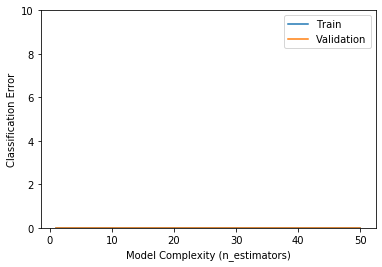

In [41]:
import matplotlib.pyplot as plt

results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0, 10)) # Zoom in
plt.legend();